In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scout.utils import read_csv

In [2]:
working_dir2 = '/data/datasets/organoid_phenotyping/analysis/d35_vs_d60/'
analysis = pd.read_csv(os.path.join(working_dir2, 'analysis.csv'), index_col=0)
dfs = []
for i, org_path in enumerate(analysis.index):
    folder = analysis.loc[org_path]['type']
    if folder != 'Lancaster_d60':
        continue
    path = os.path.join(working_dir2, folder, org_path, 'individual_ventricle_cellfreq.xlsx')
    df = pd.read_excel(path, index_col=0)
    path2 = os.path.join(working_dir2, folder, org_path, 'individual_ventricle_cyto.xlsx')
    df2 = pd.read_excel(path2, index_col=0)
    df['org_name'] = len(df) * [org_path]
    df['org_idx'] = len(df) * [i]
    df['dist'] = df2['dist']
    df['dist_adj'] = df['dist'] - df['eq_diam']/2
    dfs.append(df)
df_ctrl = pd.concat(dfs).dropna()
df_ctrl.head()

,sox2_count,tbr1_count,dn_count,sox2_freq,tbr1_freq,dn_freq,eq_diam,volume,org_name,org_idx,dist,dist_adj
0,1191,8912,21175,0.038078,0.284929,0.676993,23.007033,6.376473e+03,20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_5...,12,84.925377,73.421860
1,7217,14016,58978,0.089975,0.174739,0.735286,42.885497,4.129809e+04,20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_5...,12,99.082165,77.639417
2,1834,6481,12318,0.088887,0.314108,0.597005,20.067140,4.231117e+03,20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_5...,12,65.252442,55.218872
3,128573,287670,1140835,0.082573,0.184750,0.732677,182.985029,3.208081e+06,20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_5...,12,247.502753,156.010238
4,2260,7996,26174,0.062037,0.219489,0.718474,28.150410,1.168027e+04,20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_5...,12,57.885465,43.810261


In [3]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/'
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
dfs = []
for i, org_path in enumerate(analysis.index):
    folder = analysis.loc[org_path]['type']
    if folder != 'Arlotta_d56':
        continue
    path = os.path.join(working_dir, folder, org_path, 'individual_ventricle_cellfreq.xlsx')
    df = pd.read_excel(path, index_col=0)
    path2 = os.path.join(working_dir, folder, org_path, 'individual_ventricle_cyto.xlsx')
    df2 = pd.read_excel(path2, index_col=0)
    df['org_name'] = len(df) * [org_path]
    df['org_idx'] = len(df) * [i]
    df['dist'] = df2['dist']
    df['dist_adj'] = df['dist'] - df['eq_diam']/2
    dfs.append(df)
df_arlotta = pd.concat(dfs).dropna()
df_arlotta.head()

,sox2_count,tbr1_count,dn_count,sox2_freq,tbr1_freq,dn_freq,eq_diam,volume,org_name,org_idx,dist,dist_adj
0,114097,810913,627384,0.073497,0.522363,0.404140,214.296209,5.152786e+06,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,271.279220,164.131116
1,421,5782,6063,0.034323,0.471384,0.494293,6.105802,1.191864e+02,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,206.954040,203.901139
2,75775,207467,210469,0.153480,0.420220,0.426300,108.649523,6.715558e+05,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,227.551370,173.226609
3,71840,220954,157614,0.159500,0.490564,0.349936,119.221489,8.872832e+05,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,241.857342,182.246597
4,476,18494,21412,0.011787,0.457976,0.530236,35.677164,2.377769e+04,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,79.955214,62.116632


In [4]:
data_flatten = {'freq': pd.concat([df_ctrl['sox2_freq'], df_ctrl['tbr1_freq'], df_ctrl['dn_freq']]),
                'type': len(df_ctrl) * ['SOX2'] + len(df_ctrl) * ['TBR1'] + len(df_ctrl) * ['DN'],
                'eq_diam': 3 * list(df_ctrl['eq_diam']),
                'dist_adj': 3 * list(df_ctrl['dist_adj'])}
df_ctrl_flatten = pd.DataFrame(data_flatten)

df_arlotta = df_arlotta.where(df_arlotta['dist_adj'] < 510).dropna()
data_flatten = {'freq': pd.concat([df_arlotta['sox2_freq'], df_arlotta['tbr1_freq'], df_arlotta['dn_freq']]),
                'type': len(df_arlotta) * ['SOX2'] + len(df_arlotta) * ['TBR1'] + len(df_arlotta) * ['DN'],
                'eq_diam': 3 * list(df_arlotta['eq_diam']),
                'dist_adj': 3 * list(df_arlotta['dist_adj'])}
df_arlotta_flatten = pd.DataFrame(data_flatten)

df_ctrl_flatten.shape, df_arlotta_flatten.shape

((4008, 4), (1662, 4))

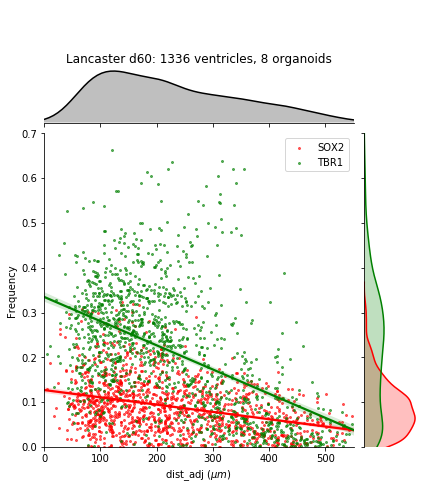

In [5]:
p = sns.JointGrid(x='dist_adj', y='freq', data=df_ctrl_flatten)

sns.regplot(x='dist_adj', y='sox2_freq', data=df_ctrl, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='dist_adj', y='tbr1_freq', data=df_ctrl, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
# sns.regplot(x='dist_adj', y='dn_freq', data=df_ctrl, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_ctrl_flatten['dist_adj'], ax=p.ax_marg_x, color='k', hist=False, kde_kws={'shade': True})
sns.distplot(df_ctrl['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True, hist=False, kde_kws={'shade': True})
sns.distplot(df_ctrl['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True, hist=False, kde_kws={'shade': True})
# sns.distplot(df_ctrl['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True, hist=False, kde_kws={'shade': True})

p.ax_joint.set_xlim([0, 550])
p.ax_joint.set_ylim([0, 0.7])
p.ax_joint.legend()
p.ax_marg_x.set_title("Lancaster d60: {} ventricles, {} organoids".format(len(df_ctrl), len(df_ctrl['org_idx'].unique())))
p.ax_joint.set_xlabel('dist_adj ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_ctrl['dist_adj'], df_ctrl['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_ctrl['dist_adj'], df_ctrl['tbr1_freq'])
# r_dn, p_dn = stats.pearsonr(df_ctrl['dist_adj'], df_ctrl['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
# p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

# plt.savefig(os.path.join(working_dir, ''))

plt.show()

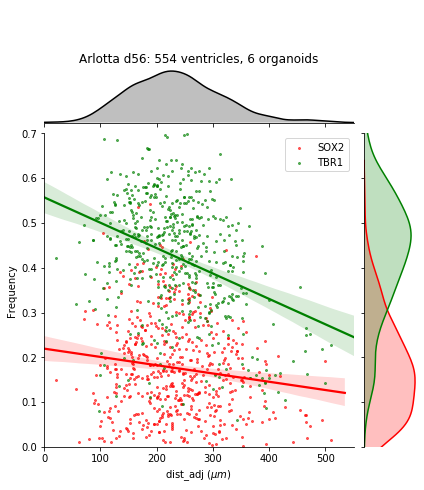

In [6]:
p = sns.JointGrid(x='dist_adj', y='freq', data=df_arlotta_flatten)

sns.regplot(x='dist_adj', y='sox2_freq', data=df_arlotta, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='dist_adj', y='tbr1_freq', data=df_arlotta, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
# sns.regplot(x='dist_adj', y='dn_freq', data=df_arlotta, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_arlotta_flatten['dist_adj'], ax=p.ax_marg_x, color='k', hist=False, kde_kws={'shade': True})
sns.distplot(df_arlotta['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True, hist=False, kde_kws={'shade': True})
sns.distplot(df_arlotta['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True, hist=False, kde_kws={'shade': True})
# sns.distplot(df_arlotta['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True, hist=False, kde_kws={'shade': True})

p.ax_joint.set_xlim([0, 550])
p.ax_joint.set_ylim([0, 0.7])
p.ax_joint.legend()
p.ax_marg_x.set_title("Arlotta d56: {} ventricles, {} organoids".format(len(df_arlotta), len(df_arlotta['org_idx'].unique())))
p.ax_joint.set_xlabel('dist_adj ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_arlotta['dist_adj'], df_arlotta['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_arlotta['dist_adj'], df_arlotta['tbr1_freq'])
# r_dn, p_dn = stats.pearsonr(df_arlotta['dist_adj'], df_arlotta['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
# p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

# plt.savefig(os.path.join(working_dir, ''))

plt.show()

In [7]:
import statsmodels.api as sm

In [8]:
mod = sm.OLS(df_ctrl['sox2_freq'], sm.add_constant(df_ctrl['dist_adj']))
res = mod.fit()
display(res.summary())
print(res.params)

mod = sm.OLS(df_arlotta['sox2_freq'], sm.add_constant(df_arlotta['dist_adj']))
res = mod.fit()
display(res.summary())
print(res.params)

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sox2_freq   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     203.6
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           4.20e-43
Time:                        14:14:43   Log-Likelihood:                 1930.7
No. Observations:                1336   AIC:                            -3857.
Df Residuals:                    1334   BIC:                            -3847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1271      0.003     41.276      0.000       0.121       0.133
dist_adj      -0.0002   1.14e-05    -14.270      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      135.004   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.571
Skew:                           0.795   Prob(JB):                     1.37e-40
Kurtosis:                       3.876   Cond. No.                         533.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const       0.127129
dist_adj   -0.000163
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sox2_freq   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     10.80
Date:                Fri, 08 Nov 2019   Prob (F-statistic):            0.00108
Time:                        14:14:43   Log-Likelihood:                 455.50
No. Observations:                 554   AIC:                            -907.0
Df Residuals:                     552   BIC:                            -898.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2195      0.014     15.749      0.000       0.192       0.247
dist_adj      -0.0002   5.62e-05     -3.287      0.001      -0.000   -7.44e-05
==============================================================================
Omnibus:                       25.063   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.517
Skew:                           0.536   Prob(JB):                     1.06e-06
Kurtosis:                       2.797   Cond. No.                         764.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const       0.219534
dist_adj   -0.000185
dtype: float64


In [9]:
mod = sm.OLS(df_ctrl['tbr1_freq'], sm.add_constant(df_ctrl['dist_adj']))
res = mod.fit()
display(res.summary())
print(res.params)

mod = sm.OLS(df_arlotta['tbr1_freq'], sm.add_constant(df_arlotta['dist_adj']))
res = mod.fit()
display(res.summary())
print(res.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tbr1_freq   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     536.4
Date:                Fri, 08 Nov 2019   Prob (F-statistic):          5.14e-100
Time:                        14:14:44   Log-Likelihood:                 975.15
No. Observations:                1336   AIC:                            -1946.
Df Residuals:                    1334   BIC:                            -1936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3350      0.006     53.196      0.000       0.323       0.347
dist_adj      -0.0005   2.33e-05    -23.160      0.000      -0.001      -0.000
==============================================================================
Omnibus:                      158.400   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.950
Skew:                           0.822   Prob(JB):                     8.73e-55
Kurtosis:                       4.330   Cond. No.                         533.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const       0.335007
dist_adj   -0.000540
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tbr1_freq   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     76.95
Date:                Fri, 08 Nov 2019   Prob (F-statistic):           2.19e-17
Time:                        14:14:44   Log-Likelihood:                 378.26
No. Observations:                 554   AIC:                            -752.5
Df Residuals:                     552   BIC:                            -743.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5573      0.016     34.778      0.000       0.526       0.589
dist_adj      -0.0006   6.46e-05     -8.772      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       18.145   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.107
Skew:                          -0.450   Prob(JB):                     7.10e-05
Kurtosis:                       3.127   Cond. No.                         764.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const       0.557315
dist_adj   -0.000567
dtype: float64


In [13]:
working_dir

'/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/'

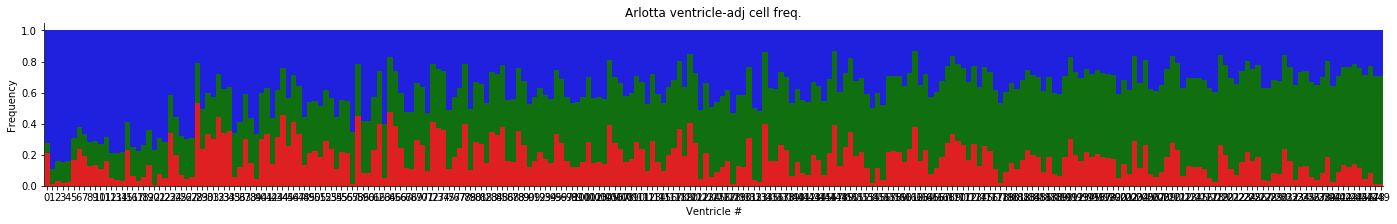

In [11]:
freq_arlotta = df_arlotta[['sox2_freq', 'tbr1_freq', 'dn_freq']].sample(250)
cfreq_arlotta = freq_arlotta.cumsum(axis=1)
cfreq_arlotta_sort = cfreq_arlotta.iloc[np.argsort(freq_arlotta['tbr1_freq'])]

plt.figure(figsize=(24, 3))
ax1 = sns.barplot(x=np.arange(len(cfreq_arlotta)), y=cfreq_arlotta_sort['dn_freq'], color='b')
ax2 = sns.barplot(x=np.arange(len(cfreq_arlotta)), y=cfreq_arlotta_sort['tbr1_freq'], color='g')
ax3 = sns.barplot(x=np.arange(len(cfreq_arlotta)), y=cfreq_arlotta_sort['sox2_freq'], color='r')
for i, patch in enumerate(ax1.patches):
    patch.set_width(1)
plt.ylabel('Frequency')
plt.xlabel('Ventricle #')
plt.title('Arlotta ventricle-adj cell freq.')
sns.despine()
plt.savefig(os.path.join(working_dir, 'ventricle_celltype_fractions_arlotta.pdf'), bbox_inches='tight')
plt.show()

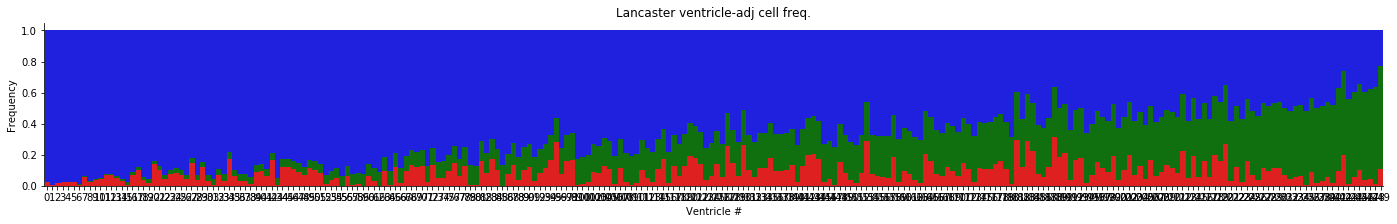

In [12]:
freq_ctrl = df_ctrl[['sox2_freq', 'tbr1_freq', 'dn_freq']].sample(250)
cfreq_ctrl = freq_ctrl.cumsum(axis=1)
cfreq_ctrl_sort = cfreq_ctrl.iloc[np.argsort(freq_ctrl['tbr1_freq'])]

plt.figure(figsize=(24, 3))
ax1 = sns.barplot(x=np.arange(len(cfreq_ctrl)), y=cfreq_ctrl_sort['dn_freq'], color='b')
ax2 = sns.barplot(x=np.arange(len(cfreq_ctrl)), y=cfreq_ctrl_sort['tbr1_freq'], color='g')
ax3 = sns.barplot(x=np.arange(len(cfreq_ctrl)), y=cfreq_ctrl_sort['sox2_freq'], color='r')
for i, patch in enumerate(ax1.patches):
    patch.set_width(1)
plt.ylabel('Frequency')
plt.xlabel('Ventricle #')
plt.title('Lancaster ventricle-adj cell freq.')
sns.despine()
plt.savefig(os.path.join(working_dir, 'ventricle_celltype_fractions_lancaster.pdf'), bbox_inches='tight')
plt.show()

In [16]:
df_ctrl.shape, df_arlotta.shape

((1336, 12), (554, 12))